## 10.1.A

In [24]:
import re
def tokenize(sentence):
    tokens = []
    # tokenize the sentence
    s = re.sub("[^\w\s]","",sentence)
    s = s.lower()
    tokens = s.split()
    return tokens


#### Assignment 10.1.b

def ngram(tokens, n):
    ngrams = []
    token = []
    # Create ngrams
    s = re.sub("[^\w\s]","",tokens)
    s = s.lower()
    token = s.split()
    base = 0
    while base < len(token):
        b = base + n
        string = ""
        while base < b:
            if(base < len(token)):
                string = string + token[base] + " "
            base +=1
        ngrams.append(string.strip())
    return ngrams

In [25]:
#testing 1.a and 1.b
test = "This is testing. the 2, above function!!!"
print(tokenize(test))
print(ngram(test, 3))

['this', 'is', 'testing', 'the', '2', 'above', 'function']
['this is testing', 'the 2 above', 'function']


## 10.1.c

In [36]:
def one_hot_encode(tokens, num_words):
    results = []
    token = ngram(tokens, num_words)
   #print(token)
    unique = []
    for t in token:
        if t not in unique:
            unique.append(t)
    #print(unique)
    placement = []
    for t in token:
        placement.append(unique.index(t))
    for i in range(len(token)):
        holder = []
        for j in range(len(unique)):
            if j == placement[i]:
                holder.append(1.0)
            else:
                holder.append(0.0)
        results.append(holder)
    return results

In [37]:
#testing
test = "This is a test of the above function. this is testing vector placement,"
print(one_hot_encode(test,1))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]


## 10.2

In [40]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os

In [44]:
imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
        if label_type == 'neg':
            labels.append(0)
        else:
            labels.append(1)

In [46]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
training_samples = 200
validation_samples = 1000
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25001,)


In [50]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          100000    
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 420,065
Trainable params: 420,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 52ms/step - loss: 0.6935 - acc: 0.5099 - val_loss: 0.6920 - val_acc: 0.5250
Epoch 2/10
7/7 [==============================] - 0s 25ms/step - loss: 0.5433 - acc: 0.9468 - val_loss: 0.6932 - val_

In [52]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [53]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7620 - acc: 0.5247


[0.7620094418525696, 0.5247200131416321]

## 10.3

In [56]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 2s 472ms/step - loss: 0.6914 - acc: 0.6130 - val_loss: 0.6906 - val_acc: 0.5500
Epoch 2/10
2/2 [==============================] - 0s 123ms/step - loss: 0.6847 - acc: 0.5583 - val_loss: 0.6898 - val_acc: 0.5500
Epoch 3/10
2/2 [==============================] - 0s 121ms/step - loss: 0.6784 - acc: 0.5505 - val_loss: 0.6882 - val_acc: 0.5500
Epoch 4/10
2/2 [==============================] - 0s 122ms/step - loss: 0.6680 - acc: 0.5583 - val_loss: 0.6876 - val_acc: 0.5500
Epoch 5/10
2/2 [==============================] - 0s 157ms/step - loss: 0.6558 - acc: 0.5557 - val_loss: 0.6868 - val_acc: 0.5500
Epoch 6/10
2/2 [==============================] - 0s 126ms/step - loss: 0.6320 - acc: 0.5583 - val_loss: 0.6773 - val_acc: 0.5750
Epoch 7/10
2/2 [==============================] - 0s 129ms/step - loss: 0.6102 - acc: 0.6453 - val_loss: 0.6823 - val_acc: 0.5250
Epoch 8/10
2/2 [==============================] - 0s 128ms/step - loss: 0.6040 - acc: 0.78

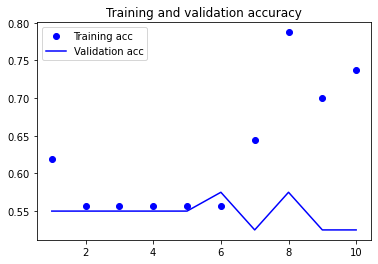

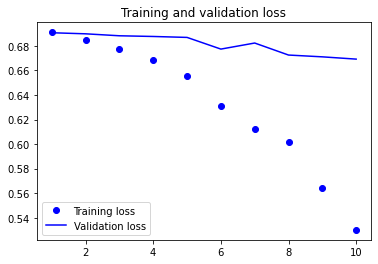

In [57]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 10.4

In [60]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(10000, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

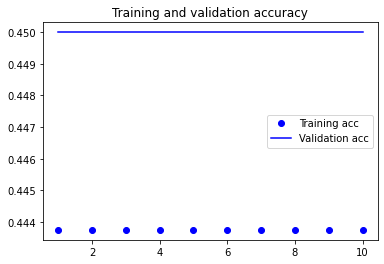

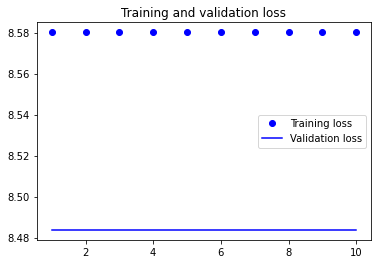

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()